# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Joshua Lin"
COLLABORATORS = ""

# CPSC4300/6300-001 Problem Set #3¶



# Part D. Develop Machine Learning Models (85 points)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## 1. Load the train and test dataset

In Part C, you have prepared a cleaned train data and test data. In this part, you develop machine learning models using the prepared data sets.

In [3]:
df_train = pd.read_csv("input/housing_train_scaled.csv")
df_test = pd.read_csv("input/housing_test_scaled.csv")

## 2. Create a Data Structure to Keep Model Performance

In the model development phase, you may test numerous models. To compare these models, it is beneficial to create some utilities to keep the model performance data. Below is one example. 

In [4]:
from collections  import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model_perf = defaultdict(dict)

def compute_model_perf(model_name, tag, y_true, y_pred):
    model_perf[model_name]['{}.explained_variance'.format(tag)] = explained_variance_score(y_true, y_pred)
    model_perf[model_name]['{}.RSME'.format(tag)] = mean_squared_error(y_true, y_pred, squared=False)
    model_perf[model_name]['{}.R2'.format(tag)] = r2_score(y_true, y_pred)
    model_perf[model_name]['{}.RelativeError'.format(tag)] = mean_absolute_error(y_true/y_true, y_pred/y_true)

## 3. Build a base model

In [5]:
from sklearn.linear_model import LinearRegression
X_train, y_train = df_train[df_train.columns[:-1]], df_train[df_train.columns[-1]]
X_test, y_test = df_test[df_test.columns[:-1]], df_test[df_test.columns[-1]]

__Question 3(a).__ Write code to train a linear regression model that uses all the features, save your model to a variable named `base_model`.

In [6]:
# YOUR CODE HERE
#raise NotImplementedError()
base_model = LinearRegression().fit(X_train, y_train)

In [7]:
base_model.coef_, base_model.intercept_, len(X_train.columns)

(array([-4.84506572e+04, -4.83127847e+04,  8.62051208e+03, -6.49245902e+03,
         8.06670617e+03, -3.55749063e+04,  3.78856305e+04,  6.19784384e+04,
         4.96649716e+03,  1.29052465e+02,  9.40792418e+03, -4.40265196e+04,
        -8.05407545e+04,  2.21351111e+05, -5.77633811e+04, -3.90204552e+04]),
 246695.1199555595,
 16)

In [8]:
isinstance(base_model, LinearRegression)

True

In [9]:
assert isinstance(base_model.coef_, np.ndarray)
assert base_model.coef_.shape[0] == X_train.shape[1]

__Question 3(b).__ Write code to compute the compute the following metrics for both the train and test data.

+ explained_variance
+ root_mean_squared_error
+ r2
+ mean_relative_error

Add the results to the dictionary `model_perf` with `LinearRegressionBase` as the model_name and `Train` and `Test` for the tags of train fit performance and test fit performance respectively.

Hint: you can use the `compute_model_perf` utility.

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
y_test_pred = base_model.predict(X_test)
y_train_pred = base_model.predict(X_train)
compute_model_perf('LinearRegressionBase', 'Test', y_test_pred, y_test)
compute_model_perf('LinearRegressionBase', 'Train', y_train_pred, y_train)

In [11]:
df_perf = pd.DataFrame(model_perf).T
df_perf

,Test.R2,Test.RSME,Test.RelativeError,Test.explained_variance,Train.R2,Train.RSME,Train.RelativeError,Train.explained_variance
LinearRegressionBase,0.425804,58049.331092,0.312339,0.426127,0.407574,58664.971038,0.415679,0.407574


In [12]:
tags = np.unique([col.split('.')[0] for col in df_perf.columns])
assert 'Train' in tags and 'Test' in tags

### Analyze modeling errors

Besides the performance metrics we collected above, we can also plot the errors to detect some patterns in the model prediction errors. 

Text(0, 0.5, 'Absolute Error')

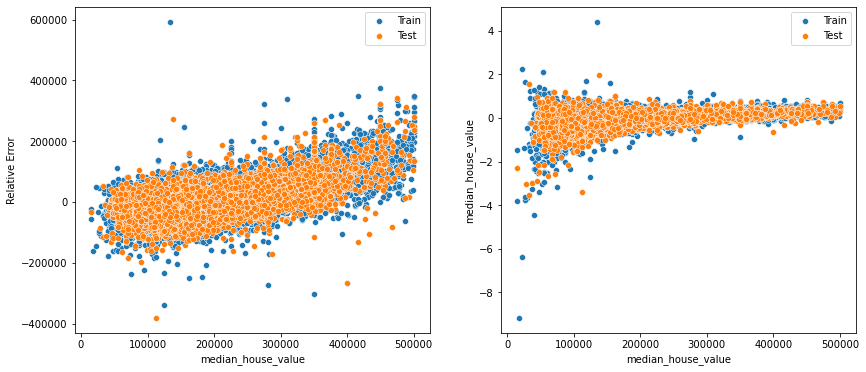

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
_ = sns.scatterplot(x=y_train, y=(y_train-y_train_pred), ax = ax[0], label='Train')
_ = sns.scatterplot(x=y_test, y=(y_test-y_test_pred), ax = ax[0], label='Test')
ax[0].set_ylabel('Absolute Error')
_ = sns.scatterplot(x=y_train, y=(1.0-y_train_pred/y_train), ax = ax[1], label='Train')
_ = sns.scatterplot(x=y_test, y=(1.0-y_test_pred/y_test), ax = ax[1], label='Test')
_ = ax[0].set_ylabel('Relative Error')

__Question 3(c).__ Based on the above and model performance results and plots, do you think linear regression is a biased model or not? Justify your conclusion. (6 points: 2 point for answer; 4 points for justification)

### Type your answer here
1. Is the base linear regression model  biased?
2. Justify your conclusion

In [14]:
#1. No
#2. Because the RMSE are about the same for both the Test and Train data, we can see the model fits pretty well.

__Question 3(d)__. List one pattern that you have observed in the model prediction errors and describe in which way you may be able to reduce the prediction errors of the base linear regression model. (6 points: 2 points for pattern; 4 points for ways of improvement) 

### Type your answer here
1. Patterns observed
2. Ways of improvements

In [15]:
#1. There seems to be a higher relative error the larger the median_house_value.
#2. One way to reduce the errors is to find outliers and remove them from both data sets.

## 4. Hypothesis Tests on the Coefficients

__Question 4(a).__ Estimate an ordinary least squares (OLS) linear regression model using the `statsmodels` package and output the model parameters. (4 points)

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# YOUR CODE HERE
#raise NotImplementedError()
base_ols_model = sm.OLS(y_train, X_train).fit()
base_ols_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
longitude,-4.845e+04,2047.224,-23.667,0.000,-5.25e+04,-4.44e+04
latitude,-4.831e+04,2195.382,-22.007,0.000,-5.26e+04,-4.4e+04
housing_median_age,8620.5121,572.215,15.065,0.000,7498.893,9742.131
total_rooms,-6492.4590,2130.109,-3.048,0.002,-1.07e+04,-2317.159
total_bedrooms,8066.7062,3223.493,2.502,0.012,1748.226,1.44e+04
population,-3.557e+04,1304.071,-27.280,0.000,-3.81e+04,-3.3e+04
households,3.789e+04,3080.745,12.298,0.000,3.18e+04,4.39e+04
median_income,6.198e+04,733.483,84.499,0.000,6.05e+04,6.34e+04
rooms_per_household,4966.4972,647.624,7.669,0.000,3697.066,6235.928
population_per_household,129.0525,514.464,0.251,0.802,-879.366,1137.470


__Question 4(b).__ Based on the t-statistic and p-value in the output of 4(a), which feature would be most irrelevant in the base regression model? Explain why? (6 points: 2 points for identify the feature; 4 points for explanation)

### Type your answer here
1. Irrelevant feature identified
2. Explain

In [17]:
#1. population_per_household
#2. The p-value of population_per_household is at .802, which is above .05, and is the largest p-value. This means that this
# feature is not as relevant.
# In addition, its t-value is the only one between 2 and -2 which also means that it is not as relevant.

## 5. Feature Selection

Feature selection is an important component in model development. In this question, we apply univariate F-test statistics and mutual information to the housing data.

In [18]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

f_test, pval = f_regression(X_train, y_train)

mi = mutual_info_regression(X_train, y_train)

df_features = pd.DataFrame({'f_test': pd.Series(f_test, index=X_train.columns), 
                   #'pval': pd.Series(pval, index=X_train.columns),
                   'mi': pd.Series(mi, index=X_train.columns)
                  })
df_features['f_test'] = df_features['f_test']/df_features['f_test'].max()
df_features['mi'] = df_features['mi']/df_features['mi'].max()

In [19]:
df_features.sort_values(by='mi', ascending=False)

,f_test,mi
longitude,0.000599,1.000000
median_income,1.000000,0.924259
latitude,0.040175,0.888673
ocean_proximity_INLAND,0.431597,0.528158
bedrooms_per_room,0.057689,0.316689
ocean_proximity_<1H OCEAN,0.142302,0.288742
rooms_per_household,0.015135,0.234086
population_per_household,0.000454,0.193690
total_rooms,0.028993,0.080309
households,0.011847,0.065546


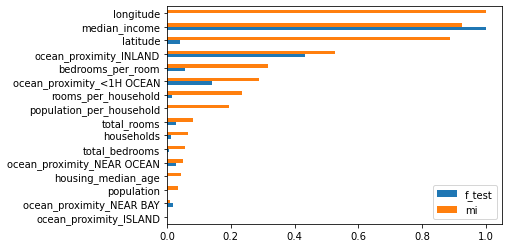

In [20]:
df_features.sort_values(by='mi', ascending=True)[['f_test', 'mi']].plot.barh()

#### __Question 5(a).__ Brief describe what F-Test in regression is? (4 points)

### Type your answer here
what is F_Test?

In [21]:
# it is a linear model for testing the individual effect of each of many regressors

__Question 5(b).__ Write some code to find the top 5 most discriminative features according to their F-Test scores? (3 points)

In [22]:
# YOUR CODE HERE
#raise NotImplementedError()
sorted_by_f_test = df_features.sort_values(by='f_test', ascending=False)
i = 0
for x in sorted_by_f_test.index:
    if(i < 5) :
        print(x)
    i = i + 1

median_income
ocean_proximity_INLAND
ocean_proximity_<1H OCEAN
bedrooms_per_room
latitude


__Question 5(c)__ Modify the following code to assess the linear regression models that use the set of discriminative features sorted by the feature's __F-Test__ scores and __mutual information (MI)__ scores. (5 points)

```
y =  df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]
model_perf = defaultdict(dict)

metric = 'f_test'
for n_features in range(2, len(df_train.columns)):
    features = list(df_features.sort_values(by=metric, ascending=False).iloc[:n_features].index)
   
    model_name = metric + "-{}".format(n_features)
    model = LinearRegression()
    
    X = df_train[features]
    _ = model.fit(X, y)    
    y_train_pred = model.predict(X)    
    
    X_test = df_test[features]
    y_test_pred = model.predict(X_test)
    
    compute_model_perf(model_name, 'Train', y, y_train_pred)
    compute_model_perf(model_name, 'Test', y_test, y_test_pred)
```

In [23]:
# YOUR CODE HERE
#raise NotImplementedError()
y =  df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]
model_perf = defaultdict(dict)

metric = 'f_test'
for n_features in range(2, len(df_train.columns)):
    features = list(df_features.sort_values(by=metric, ascending=False).iloc[:n_features].index)

    model_name = metric + "-{}".format(n_features)
    model = LinearRegression()

    X = df_train[features]
    _ = model.fit(X, y)    
    y_train_pred = model.predict(X)    

    X_test = df_test[features]
    y_test_pred = model.predict(X_test)

    compute_model_perf(model_name, 'Train', y, y_train_pred)
    compute_model_perf(model_name, 'Test', y_test, y_test_pred)
metric = 'mi'
for n_features in range(2, len(df_train.columns)):
    features = list(df_features.sort_values(by=metric, ascending=False).iloc[:n_features].index)

    model_name = metric + "-{}".format(n_features)
    model = LinearRegression()

    X = df_train[features]
    _ = model.fit(X, y)    
    y_train_pred = model.predict(X)    

    X_test = df_test[features]
    y_test_pred = model.predict(X_test)

    compute_model_perf(model_name, 'Train', y, y_train_pred)
    compute_model_perf(model_name, 'Test', y_test, y_test_pred)
#pd.DataFrame(model_perf).T

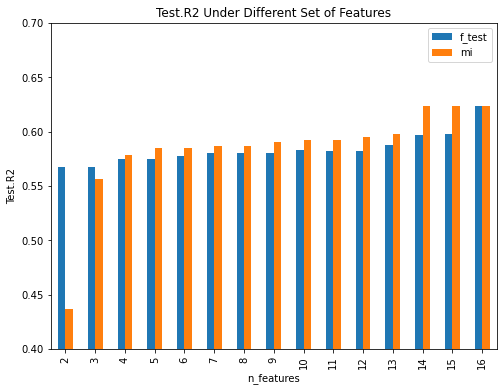

In [24]:
df_perf = pd.DataFrame(model_perf).T

index = pd.MultiIndex.from_tuples([(a[0], int(a[1])) for a in df_perf.index.str.split('-')])
df2 = df_perf.set_index(index)
df_r2 = pd.DataFrame({'f_test': df2.loc['f_test', 'Test.R2'], 'mi': df2.loc['mi', 'Test.R2']})
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
_ = df_r2.plot.bar(ax=ax)
_ = ax.set_xlabel('n_features')
_ = ax.set_ylabel('Test.R2')
_ = ax.set_ylim(0.4, 0.7)
_ = ax.set_title('Test.R2 Under Different Set of Features')

## 6. Nonlinear Regression Models

__Question 6(a).__ The error plots in question 3 indicate a non-linear relationship between the features and the target variable. Complete the following code to perform a polynomial regression. (5 points)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

y =  df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]
model_perf = defaultdict(dict)

for deg in range(1, 4):
# YOUR CODE HERE
#raise NotImplementedError()
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=True), LinearRegression())
    features = list(df_features.index)
    X = df_train[features]
    _ = model.fit(X, y)
    y_train_pred = model.predict(X)
    
    y_test2 = df_test[features]
    y_test_pred = model.predict(y_test2)
    
    compute_model_perf('Polynomial Regression Deg=' + str(deg), 'Train', y, y_train_pred)
    compute_model_perf('Polynomial Regression Deg=' + str(deg), 'Test', y_test, y_test_pred)

df_perf = pd.DataFrame(model_perf).T

In [26]:
df_perf = pd.DataFrame(model_perf).T
df_perf

,Train.explained_variance,Train.RSME,Train.R2,Train.RelativeError,Test.explained_variance,Test.RSME,Test.R2,Test.RelativeError
Polynomial Regression Deg=1,0.627973,58664.971038,0.627973,0.263013,6.236406e-01,5.804933e+04,6.234285e-01,0.265675
Polynomial Regression Deg=2,0.703172,52401.534268,0.703172,0.231242,6.897855e-01,5.269286e+04,6.897180e-01,0.231251
Polynomial Regression Deg=3,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178


__Question 6(b)__. In the above results, `Train.R2` descreases as the order of the polynomial increases. Does that mean it is beneficial to use a higher order polynomial in the regression? Justify your answer. (6 points: 2 points for correct answer; 4 points for justification)

### Type your answer here
1. Is a higher order polynomial preferable?
2. Justification

In [27]:
#1. No
#2. If train.r2 decreases as order of polynomial increases, then the model would fit the data worse. However,
# from what I see from my data, it seesm the higher the polynomial degree, the higher train.r2 is and the better it fits.

## 7. K-Nearest Neighbors Regression

The k-nearest neighbors (___k_-NN__) algorithm is a type of instance-based learning where the function is only approximated locally and all computation is deferred until function evaluation.

__Question 7(a)__. Complete the following code to assess the performance of ___k_-NN__ regression on the housing data. (5 points)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

model_perf = defaultdict(dict)

y = df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]

features = df_train.columns[:-1]
X = df_train[features]
X_test = df_test[features]

for n_neighbors in range(1, 16):
# YOUR CODE HERE
    neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
    neigh.fit(X, y)
    y_train_pred = model.predict(X)
    y_test_pred = model.predict(X_test)
    
    compute_model_perf('KNeighborsRegressor n_neighbors=' + str(n_neighbors), 'Train', y, y_train_pred)
    compute_model_perf('KNeighborsRegressor n_neighbors=' + str(n_neighbors), 'Test', y_test, y_test_pred)
    
#raise NotImplementedError()

KNeighborsRegressor(n_neighbors=1)

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=13)

KNeighborsRegressor(n_neighbors=14)

KNeighborsRegressor(n_neighbors=15)

In [29]:
df_perf = pd.DataFrame(model_perf).T
df_perf

,Train.explained_variance,Train.RSME,Train.R2,Train.RelativeError,Test.explained_variance,Test.RSME,Test.R2,Test.RelativeError
KNeighborsRegressor n_neighbors=1,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=2,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=3,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=4,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=5,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=6,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=7,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=8,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=9,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178
KNeighborsRegressor n_neighbors=10,0.771377,45988.739181,0.771377,0.195013,-1.788208e+10,1.265113e+10,-1.788594e+10,646.016178


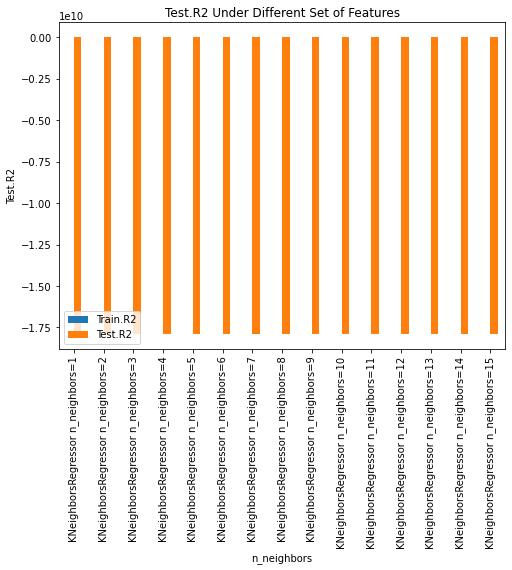

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
_ = df_perf[['Train.R2', 'Test.R2']].plot.bar(ax=ax)
_ = ax.set_xlabel('n_neighbors')
_ = ax.set_ylabel('Test.R2')
_ = ax.set_title('Test.R2 Under Different Set of Features')

__Question 7(b)__. What pattern(s) have you observed from the above results? Explain why such pattern or patterns occur. (6 points: 2 points for pattern; 4 points for explanation)

### Type your answer here
1. Pattern
2. Explain

In [31]:
#1. It seems that changing the n_neighbors did not change the value of test.r2.
#2. This happened because the data are all similar and none are an outlier. The model already fits the data perfectly.
# It is also because the data is already scaled so none of the values are too different from each other.

__Question 7(c)__. In the above study, we use the scaled data set. Assume we use a non-scaled data set in ___k_-NN__ regression. How do you expect the model performance change? Explain why.  (6 point: 2 points for possible change; 4 points for explanation)

### Type your answer here
1. Change
2. Explain

In [32]:
#1. The model would definitely fit better the larger the n_neighbors is until it reaches a certain point.
# After that certain point, the model would start not fitting again.
#2. With a non-scaled data set, the data ranges will vary. Thus, with n_neighbors at 1, the model would overfit
# and there would be a ton of error. As n_neighbors becomes larger, the model would fit better.
# However, if n_neighbors becomes too large, the model will overfit again.

## 8. Random Forest Regression

Random forests regression is an ensemble learning method that operates by constructing multiple decision trees and outputs the  mean/average prediction of the individual trees.

__Question 8(a)__. Complete the following code to assess the performance of Random Forest Regression on the housing data. (5 poinst)

In [33]:
from sklearn.ensemble import RandomForestRegressor

model_perf = defaultdict(dict)

y = df_train[df_train.columns[-1]]
y_test = df_test[df_test.columns[-1]]

features = df_train.columns[:-1]
X = df_train[features]
X_test = df_test[features]

for n_estimators in [10, 50, 100, 200]:
# YOUR CODE HERE
    regr = RandomForestRegressor(n_estimators = n_estimators)
    regr.fit(X, y)
    y_train_pred = regr.predict(X)
    y_test_pred = regr.predict(X_test)
    
    compute_model_perf('RandomForestRegressor n_estimators=' + str(n_estimators), 'Train', y, y_train_pred)
    compute_model_perf('RandomForestRegressor n_estimators=' + str(n_estimators), 'Test', y_test, y_test_pred)
#raise NotImplementedError()

RandomForestRegressor(n_estimators=10)

RandomForestRegressor(n_estimators=50)

RandomForestRegressor()

RandomForestRegressor(n_estimators=200)

In [34]:
df_perf = pd.DataFrame(model_perf).T
df_perf

,Train.explained_variance,Train.RSME,Train.R2,Train.RelativeError,Test.explained_variance,Test.RSME,Test.R2,Test.RelativeError
RandomForestRegressor n_estimators=10,0.957117,19918.730653,0.957112,0.073128,0.757950,46562.666674,0.757714,0.185107
RandomForestRegressor n_estimators=50,0.968480,17078.882868,0.968469,0.065675,0.779061,44496.715349,0.778737,0.177093
RandomForestRegressor n_estimators=100,0.969842,16705.167774,0.969834,0.064715,0.782048,44190.611826,0.781771,0.175523
RandomForestRegressor n_estimators=200,0.970423,16544.956124,0.970410,0.064330,0.783017,44091.639491,0.782747,0.176020


__Question 8(b)__. Brief describe any observation(s) you have regarding the model performance of the Random Forest Regression. (6 Points)

### Type your answer here

In [35]:
# This model took the longest to run compared to all the other models. This model also had the higest r2 values for train
# which hopfully means that it is the most accurate out of all the models.

### Model Persistence

Model development is a time consuming process. When you have developed a good model, you should save the model and load it for prediction.

In [36]:
# Create a model 
from sklearn.ensemble import RandomForestRegressor

features = df_train.columns[:-1]
X = df_train[features]
y = df_train[df_train.columns[-1]]

model_rf200 = RandomForestRegressor(n_estimators=200)
model_rf200.fit(X, y)

RandomForestRegressor(n_estimators=200)

In [37]:
# Save the model using joblib.dump(); to load the saved model, use joblib.load()
import joblib
joblib.dump(model_rf200, "models/model_rs200.joblib")

['models/model_rs200.joblib']

In [38]:
# Load the predict data
df_to_predict = pd.read_csv("input/housing_prediction_scaled.csv")
df_to_predict

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.915691,-0.674107,-0.700419,0.602277,0.016307,0.042643,0.001980,1.521327,1.002861,-0.013167,-1.207005,0,1,0,0,0
1,0.768668,-0.669447,-1.224248,0.540694,0.385095,0.690767,0.650020,0.553560,-0.124839,-0.011903,-0.490694,0,1,0,0,0
2,0.221132,-0.128817,-1.486162,-0.831327,-0.948216,-0.874963,-0.868985,0.291121,-0.244126,-0.045908,-0.615101,0,1,0,0,0
3,0.565877,-0.734695,0.085324,0.190218,0.174697,-0.265215,0.128996,-0.282541,0.056428,-0.086110,-0.217034,1,0,0,0,0
4,0.545597,-0.711392,0.696458,-0.093696,0.068316,-0.363287,0.118627,0.214433,-0.388978,-0.101549,0.305279,1,0,0,0,0


__Question 8(c)__. Load the saved model `models/model_rs200.joblib` and apply the model to predict the median housing price of some unknown blocks stored in `../input/housing_prediction_scaled.csv`. Save your results to y_predict. (5 points)

In [39]:
# YOUR CODE HERE
#raise NotImplementedError()
model = joblib.load("models/model_rs200.joblib")
y_predict = model.predict(df_to_predict)

If you are interest in seeing the performance of your model, you can peek the actual value as follows.

In [40]:
y_actual = pd.read_csv("input/housing_prediction_scaled_y.csv")['median_house_value']
df_predict = pd.DataFrame({'Actual': y_actual, 'Predict': y_predict})
df_predict['Absolute_Error'] = df_predict['Predict'] - df_predict['Actual']
df_predict['Relative_Error'] = df_predict['Absolute_Error'] / df_predict['Actual']

df_predict

,Actual,Predict,Absolute_Error,Relative_Error
0,254100.0,250385.5,-3714.5,-0.014618
1,184500.0,185980.5,1480.5,0.008024
2,102900.0,104902.0,2002.0,0.019456
3,301000.0,300708.5,-291.5,-0.000968
4,412500.0,386701.5,-25798.5,-0.062542


In [41]:
# Remove the model file
import os
os.remove("models/model_rs200.joblib")
assert not os.path.exists("models/model_rs200.joblib")

__Congratulations! You have done such a wonderful job that your model actually beats the experts. That should make your boss happy and consider offering you a raise.__